In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(11) # It's my lucky number
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import itertools

import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
from tensorflow.keras.layers import BatchNormalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.applications.resnet50 import ResNet50
from keras import backend as K

In [ ]:
folder_benign_train = '/content/drive/MyDrive/data_rename/train/benign'
folder_insitu_train = '/content/drive/MyDrive/data_rename/train/insitu'
folder_invasive_train = '/content/drive/MyDrive/data_rename/train/invasive'
folder_later_test = '/content/drive/MyDrive/data_rename/train/later'

folder_benign_test = '/content/drive/MyDrive/data_rename/test/benign'
folder_insitu_test = '/content/drive/MyDrive/data_rename/test/insitu'
folder_invasive_test = '/content/drive/MyDrive/data_rename/test/invasive'
folder_later_test = '/content/drive/MyDrive/data_rename/test/later'

In [ ]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [ ]:
img_path = '/content/drive/MyDrive/data_rename/train/invasive/ISIC_0024247_thumbnail_256 (2).jpg'
img= io.imread(img_path)
img.shape


(170, 256, 3)

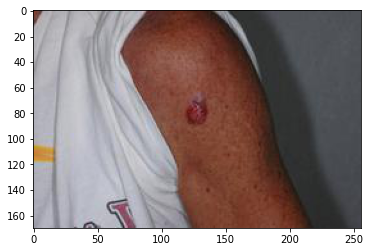

In [ ]:
plt.imshow(img)

Applying Gussian and median filter, resizing images

In [ ]:
from PIL import Image, ImageFilter

In [ ]:
import PIL
import os
import os.path
from PIL import Image

f = r'/content/drive/MyDrive/data_rename/train/benign'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.filter(ImageFilter.GaussianBlur)
    img = img.filter(ImageFilter.MedianFilter)
    img = img.resize((224,224))
    img.save(f_img)

In [ ]:
import PIL
import os
import os.path
from PIL import Image

f = r'/content/drive/MyDrive/data_rename/train/insitu'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.filter(ImageFilter.GaussianBlur)
    img = img.filter(ImageFilter.MedianFilter)
    img = img.resize((224,224))
    img.save(f_img)

In [ ]:
import PIL
import os
import os.path
from PIL import Image

f = r'/content/drive/MyDrive/data_rename/train/invasive'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.filter(ImageFilter.GaussianBlur)
    img = img.filter(ImageFilter.MedianFilter)
    img = img.resize((224,224))
    img.save(f_img)

In [ ]:
import PIL
import os
import os.path
from PIL import Image

f = r'/content/drive/MyDrive/data_rename/train/later'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.filter(ImageFilter.GaussianBlur)
    img = img.filter(ImageFilter.MedianFilter)
    img = img.resize((224,224))
    img.save(f_img)

In [ ]:
import PIL
import os
import os.path
from PIL import Image

f = r'/content/drive/MyDrive/data_rename/test/benign'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.filter(ImageFilter.GaussianBlur)
    img = img.filter(ImageFilter.MedianFilter)
    img = img.resize((224,224))
    img.save(f_img)

In [ ]:
import PIL
import os
import os.path
from PIL import Image

f = r'/content/drive/MyDrive/data_rename/test/insitu'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.filter(ImageFilter.GaussianBlur)
    img = img.filter(ImageFilter.MedianFilter)
    img = img.resize((224,224))
    img.save(f_img)

In [ ]:
import PIL
import os
import os.path
from PIL import Image

f = r'/content/drive/MyDrive/data_rename/test/invasive'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.filter(ImageFilter.GaussianBlur)
    img = img.filter(ImageFilter.MedianFilter)
    img = img.resize((224,224))
    img.save(f_img)

In [ ]:
import PIL
import os
import os.path
from PIL import Image

f = r'/content/drive/MyDrive/data_rename/test/later'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.filter(ImageFilter.GaussianBlur)
    img = img.filter(ImageFilter.MedianFilter)
    img = img.resize((224,224))
    img.save(f_img)

In [ ]:
import cv2

# Read the image in a grayscale mode
img_title = '/content/drive/MyDrive/data_rename/train/invasive/ISIC_0024284_thumbnail_256 (2).jpg'
image = cv2.imread(img_title, 0)

In [ ]:
# Set total number of bins in the histogram
bins_num = 256

# Get the image histogram
hist, bin_edges = np.histogram(image, bins=bins_num)

# Get normalized histogram if it is required
#if is_normalized:
#  hist = np.divide(hist.ravel(), hist.max())

# Calculate centers of bins
bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

# Iterate over all thresholds (indices) and get the probabilities w1(t), w2(t)
weight1 = np.cumsum(hist)
weight2 = np.cumsum(hist[::-1])[::-1]

# Get the class means mu0(t)
mean1 = np.cumsum(hist * bin_mids) / weight1

# Get the class means mu1(t)
mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]
inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2

# Maximize the inter_class_variance function val
index_of_max_val = np.argmax(inter_class_variance)
threshold = bin_mids[:-1][index_of_max_val]
print("Otsu's algorithm implementation thresholding result: ", threshold)
otsu_threshold, image_result = cv2.threshold(
    image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,
)
print("Obtained threshold: ", otsu_threshold)


Otsu's algorithm implementation thresholding result:  116.03515625
Obtained threshold:  116.0


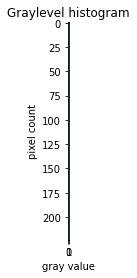

In [ ]:
image = skimage.io.imread(fname="/content/drive/MyDrive/data_rename/train/invasive/ISIC_0024284_thumbnail_256 (2).jpg")
# convert the image to grayscale
gray_image = skimage.color.rgb2gray(image)

# blur the image to denoise
#blurred_image = skimage.filter.gaussian(gray_image, sigma=1.0)

# show the histogram of the blurred image
histogram, bin_edges = np.histogram(gray_image, bins=256, range=(0.0, 1.0))
fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Graylevel histogram")
plt.xlabel("gray value")
plt.ylabel("pixel count")
plt.xlim(0, 1.0)



plt.imshow(image)

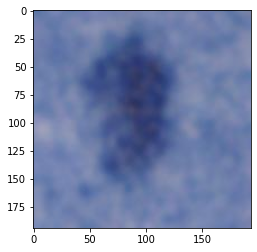

In [ ]:
path = '/content/drive/MyDrive/data_rename/train/invasive/ISIC_0024284_thumbnail_256 (2).jpg'
image=cv2.imread(path,cv2.IMREAD_COLOR)
#Image cropping
img=image[30:410,30:560]
#DULL RAZOR (REMOVE HAIR)

#Gray scale
grayScale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY )
#Black hat filter
kernel = cv2.getStructuringElement(1,(9,9))
blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
#Gaussian filter
#bhg= cv2.GaussianBlur(blackhat,(3,3),cv2.BORDER_DEFAULT)
#Binary thresholding (MASK)
ret,mask = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
#Replace pixels of the mask
dst = cv2.inpaint(img,mask,6,cv2.INPAINT_TELEA)
plt.imshow(image)
plt.imshow(blackhat)
plt.imshow(mask)
plt.imshow(dst)

In [ ]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters

# perform automatic thresholding
t = skimage.filters.threshold_otsu(gray_image)
print("Found automatic threshold t = {}.".format(t))

Found automatic threshold t = 0.4433646645220588.


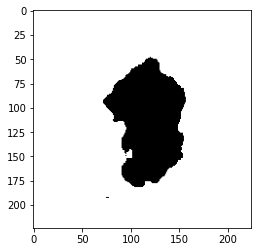

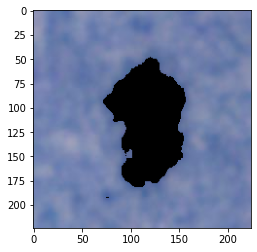

In [ ]:
# create a binary mask with the threshold found by Otsu's method
binary_mask = gray_image > t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")

# apply the binary mask to select the foreground
selection = image.copy()
selection[~binary_mask] = 0

fig, ax = plt.subplots()
plt.imshow(selection)

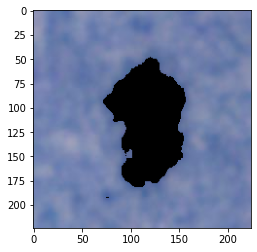

In [ ]:
# apply the binary mask to select the foreground
selection = image.copy()
selection[~binary_mask] = 0

fig, ax = plt.subplots()
plt.imshow(selection)

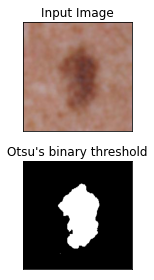

In [ ]:
# SEGMENTATION
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread(r'/content/drive/MyDrive/data_rename/train/invasive/ISIC_0024284_thumbnail_256 (2).jpg')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((2,2),np.uint8)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(closing,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)
# Threshold
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.subplot(211),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(thresh, 'gray')
plt.imsave(r'thresh.png',thresh)
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

_____DULLRAZOR_____


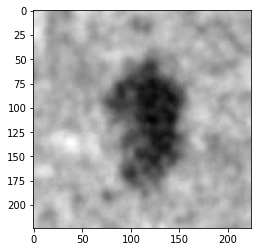

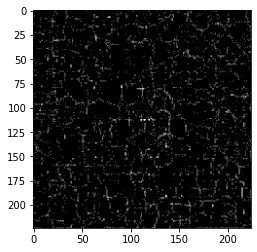

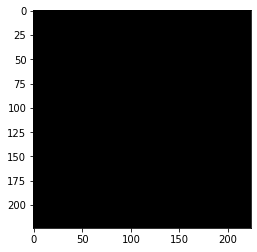

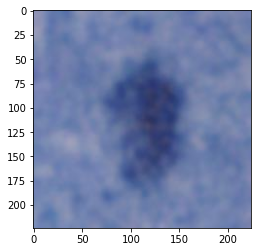

In [ ]:
#def dullrazor(img, lowbound=15, showimgs=True, filterstruc=3, inpaintmat=3):
img = cv2.imread('/content/drive/MyDrive/data_rename/train/invasive/ISIC_0024284_thumbnail_256 (2).jpg')
lowbound=15
showimgs=True
filterstruc=3
inpaintmat=3
#grayscale
imgtmp1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#applying a blackhat
filterSize =(filterstruc, filterstruc)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)
imgtmp2 = cv2.morphologyEx(imgtmp1, cv2.MORPH_BLACKHAT, kernel)

#0=skin and 255=hair
ret, mask = cv2.threshold(imgtmp2, lowbound, 255, cv2.THRESH_BINARY)

#inpainting
img_final = cv2.inpaint(img, mask, inpaintmat ,cv2.INPAINT_TELEA)

#if showimgs:
print("_____DULLRAZOR_____")
plt.imshow(imgtmp1, cmap="gray")
plt.show()
plt.imshow(imgtmp2, cmap='gray')
plt.show()
plt.imshow(mask, cmap='gray')
plt.show()
plt.imshow(img_final)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras_preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import math
import datetime
import time

In [ ]:
#Default dimensions we found online
img_width, img_height = 224, 224

#Create a bottleneck file
top_model_weights_path = "bottleneck_fc_model.h5"
# loading up our datasets
train_data_dir='/content/drive/MyDrive/data_rename/train'
validation_data_dir='/content/drive/MyDrive/data_rename/test'
# number of epochs to train top model
epochs = 7 #this has been changed after multiple model run
# batch size used by flow_from_directory and predict_generator
batch_size = 50

In [ ]:
#Loading vgc16 model
vgg16=applications.VGG16(include_top=False, weights='imagenet')
datagen = ImageDataGenerator(rescale=1. / 255)
#needed to create the bottleneck .npy files

In [ ]:
#train- creation of weights and features using vgg16
start = datetime.datetime.now()

generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)

nb_train_samples = len(generator.filenames)
num_classes = len(generator.class_indices)

predict_size_train = int(math.ceil(nb_train_samples / batch_size))

bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train)

np.save('bottleneck_features_train.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print('Time: ', elapsed)

Found 3360 images belonging to 4 classes.


<ipython-input-95-c6ab365cfe62>:16: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train)


Time:  0:30:23.928823


In [ ]:
#validation -creation of weights and features using vgg16
start = datetime.datetime.now()

generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)

nb_validation_samples = len(generator.filenames)
num_classes = len(generator.class_indices)

predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))

bottleneck_features_validation = vgg16.predict_generator(generator, predict_size_validation)

np.save('bottleneck_features_validation.npy', bottleneck_features_validation)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 450 images belonging to 4 classes.


<ipython-input-96-1f7c383a8521>:16: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  bottleneck_features_validation = vgg16.predict_generator(generator, predict_size_validation)


Time:  0:04:22.414158


In [ ]:
start = datetime.datetime.now()
datagen_top = ImageDataGenerator(rescale=1./255)
generator_top = datagen_top.flow_from_directory(
         train_data_dir,
         target_size=(img_width, img_height),
         batch_size=batch_size,
         class_mode='categorical',
         shuffle=False)

nb_train_samples = len(generator_top.filenames)
num_classes = len(generator_top.class_indices)

# load the bottleneck features saved earlier
train_data = np.load("bottleneck_features_train.npy")

# get the class lebels for the training data, in the original order
train_labels = generator_top.classes

# convert the training labels to categorical vectors
train_labels = to_categorical(train_labels, num_classes=num_classes)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)


Found 3360 images belonging to 4 classes.
Time:  0:00:02.306794


In [ ]:
generator_top = datagen_top.flow_from_directory(
         validation_data_dir,
         target_size=(img_width, img_height),
         batch_size=batch_size,
         class_mode=None,
         shuffle=False)

nb_validation_samples = len(generator_top.filenames)

validation_data = np.load('bottleneck_features_validation.npy')


validation_labels = generator_top.classes
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

Found 450 images belonging to 4 classes.


In [ ]:
start = datetime.datetime.now()
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='rmsprop',
          loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels,
      epochs=5,
      batch_size=batch_size,
      validation_data=(validation_data, validation_labels))

model.save_weights(top_model_weights_path)

(eval_loss, eval_accuracy) = model.evaluate(
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)


Epoch 1/5
68/68 [==============================] - 7s 90ms/step - loss: 1.9439 - accuracy: 0.3765 - val_loss: 1.1930 - val_accuracy: 0.4689
Epoch 2/5
68/68 [==============================] - 6s 86ms/step - loss: 1.1134 - accuracy: 0.5018 - val_loss: 0.9738 - val_accuracy: 0.5889
Epoch 3/5
68/68 [==============================] - 6s 87ms/step - loss: 1.0073 - accuracy: 0.5515 - val_loss: 0.9445 - val_accuracy: 0.5444
Epoch 4/5
68/68 [==============================] - 6s 87ms/step - loss: 0.9388 - accuracy: 0.5622 - val_loss: 0.8578 - val_accuracy: 0.6067
Epoch 5/5
9/9 [==============================] - 0s 19ms/step - loss: 1.1176 - accuracy: 0.4978
[INFO] accuracy: 49.78%
[INFO] Loss: 1.117645025253296
Time:  0:00:42.172454


In [ ]:
start = datetime.datetime.now()
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit(train_data, train_labels,
      epochs=7,
      batch_size=batch_size,
      validation_data=(validation_data, validation_labels))

model.save_weights(top_model_weights_path)

(eval_loss, eval_accuracy) = model.evaluate(
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)


Epoch 1/7


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


68/68 [==============================] - 4s 43ms/step - loss: 1.3438 - acc: 0.3446 - val_loss: 1.2310 - val_acc: 0.4667
Epoch 2/7
68/68 [==============================] - 3s 40ms/step - loss: 1.2108 - acc: 0.4503 - val_loss: 1.1437 - val_acc: 0.5178
Epoch 3/7
68/68 [==============================] - 3s 39ms/step - loss: 1.1447 - acc: 0.4908 - val_loss: 1.1275 - val_acc: 0.5267
Epoch 4/7
68/68 [==============================] - 3s 40ms/step - loss: 1.0714 - acc: 0.5336 - val_loss: 1.0615 - val_acc: 0.5600
Epoch 5/7
68/68 [==============================] - 3s 40ms/step - loss: 1.0063 - acc: 0.5705 - val_loss: 1.0059 - val_acc: 0.5600
Epoch 6/7
68/68 [==============================] - 3s 39ms/step - loss: 0.9746 - acc: 0.5804 - val_loss: 1.0336 - val_acc: 0.5622
Epoch 7/7
9/9 [==============================] - 0s 13ms/step - loss: 1.0340 - acc: 0.5667
[INFO] accuracy: 56.67%
[INFO] Loss: 1.0339744091033936
Time:  0:00:21.501552


In [ ]:
import keras
from keras import optimizers
start = datetime.datetime.now()
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dropout(0.5))
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit(train_data, train_labels,
      epochs=7,
      batch_size=batch_size,
      validation_data=(validation_data, validation_labels))

model.save_weights(top_model_weights_path)

(eval_loss, eval_accuracy) = model.evaluate(
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Epoch 1/7
68/68 [==============================] - 4s 50ms/step - loss: 1.2820 - acc: 0.4125 - val_loss: 1.1592 - val_acc: 0.4867
Epoch 2/7
68/68 [==============================] - 3s 47ms/step - loss: 1.0265 - acc: 0.5548 - val_loss: 1.0616 - val_acc: 0.5422
Epoch 3/7
68/68 [==============================] - 3s 46ms/step - loss: 0.9247 - acc: 0.6113 - val_loss: 0.9369 - val_acc: 0.5978
Epoch 4/7
68/68 [==============================] - 3s 47ms/step - loss: 0.8553 - acc: 0.6408 - val_loss: 1.1897 - val_acc: 0.4556
Epoch 5/7
68/68 [==============================] - 3s 47ms/step - loss: 0.8135 - acc: 0.6628 - val_loss: 0.8367 - val_acc: 0.6022
Epoch 6/7
68/68 [==============================] - 3s 47ms/step - loss: 0.7715 - acc: 0.6717 - val_loss: 0.8575 - val_acc: 0.5844
Epoch 7/7
9/9 [==============================] - 0s 13ms/step - loss: 0.7507 - acc: 0.6533
[INFO] accuracy: 65.33%
[INFO] Loss: 0.7507098317146301
Time:  0:00:42.037726


In [ ]:
start = datetime.datetime.now()
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='rmsprop',
          loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels,
      epochs=20,
      batch_size=batch_size,
      validation_data=(validation_data, validation_labels))

model.save_weights(top_model_weights_path)

(eval_loss, eval_accuracy) = model.evaluate(
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Epoch 1/20
68/68 [==============================] - 6s 81ms/step - loss: 1.6928 - accuracy: 0.2565 - val_loss: 1.3795 - val_accuracy: 0.3089
Epoch 2/20
68/68 [==============================] - 5s 79ms/step - loss: 1.3811 - accuracy: 0.2896 - val_loss: 1.3388 - val_accuracy: 0.3933
Epoch 3/20
68/68 [==============================] - 5s 79ms/step - loss: 1.3425 - accuracy: 0.3185 - val_loss: 1.3764 - val_accuracy: 0.2778
Epoch 4/20
68/68 [==============================] - 5s 77ms/step - loss: 1.3215 - accuracy: 0.3405 - val_loss: 1.2630 - val_accuracy: 0.4400
Epoch 5/20
68/68 [==============================] - 5s 79ms/step - loss: 1.3047 - accuracy: 0.3467 - val_loss: 1.2308 - val_accuracy: 0.4800
Epoch 6/20
68/68 [==============================] - 5s 78ms/step - loss: 1.2953 - accuracy: 0.3485 - val_loss: 1.2621 - val_accuracy: 0.4089
Epoch 7/20
68/68 [==============================] - 5s 78ms/step - loss: 1.2879 - accuracy: 0.3673 - val_loss: 1.1516 - val_accuracy: 0.5622
Epoch 8/20
68